In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Convert the data type of column -rate

In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


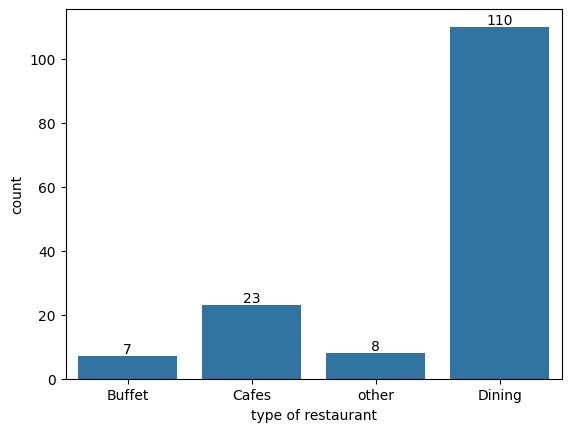

In [5]:
# which type of restaurant do the majurity of customers order from?
ax = sns.countplot(x = df['listed_in(type)'])
plt.xlabel("type of restaurant")
ax.bar_label(ax.containers[0])
plt.show()

## from the above count plot we see that the majarity of customers order from dining restaurant.

Text(0, 0.5, 'Votes')

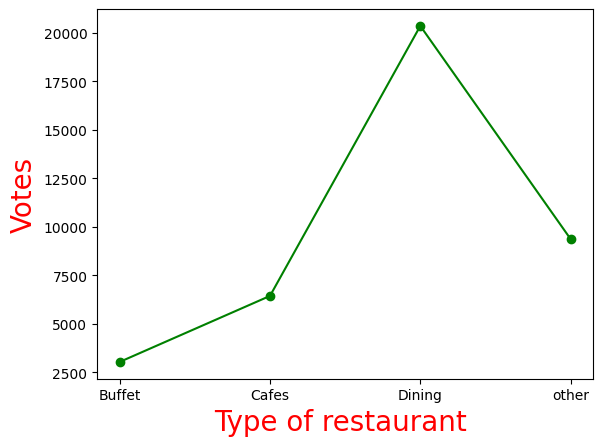

In [6]:
# 2) How many votes has each type of restaurant received from customers?
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c = 'green',marker = "o")
plt.xlabel("Type of restaurant ", c = 'red', size = 20)
plt.ylabel('Votes', c = 'red',size = 20)

## Dining type of restaurant received maximum vote

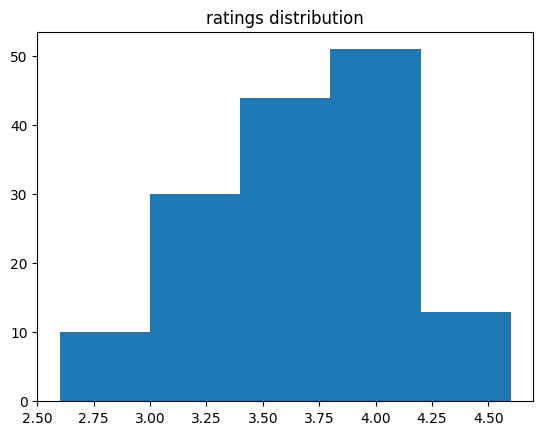

In [10]:
# Q3. What are the ratings that majority of restaurant has received?
plt.hist(df['rate'],bins =5)
plt.title('ratings distribution')
plt.show()

## Conclusion- majurity of restaurants received ratings from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

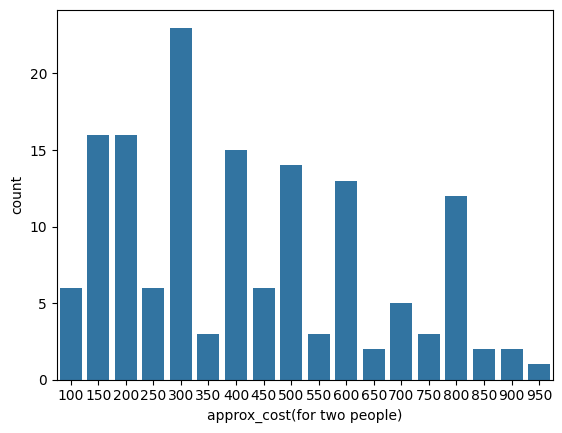

In [14]:
# Q4. Zomato has observed that most couples order most of their food online. what is there average spending
# on each order.
# df.head()
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

## Conclusion- the majurity of couples preferr restuarants with an approximate cost of 300 rupees

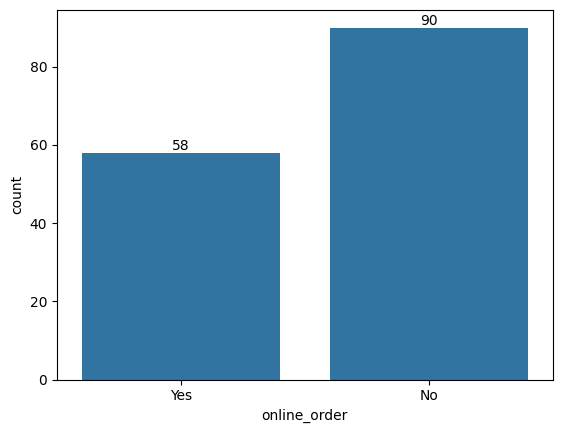

In [17]:
# Which mode(Online or Offline ) has received maximum voting?
ax = sns.countplot(x = df['online_order'])
ax.bar_label(ax.containers[0])
plt.show()

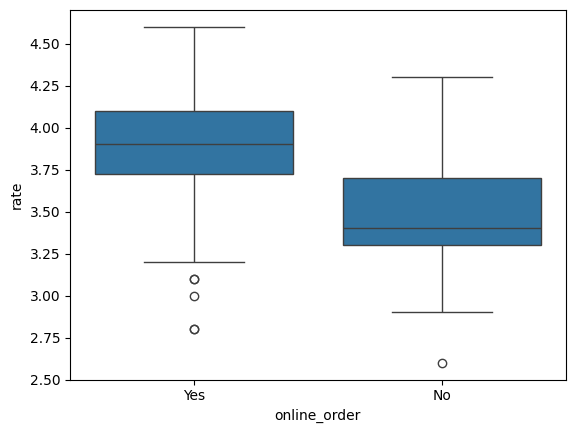

In [18]:
sns.boxplot(x='online_order', y='rate', data=df)
plt.show()

## conclusion - offline order received lower rating in comparison to online order

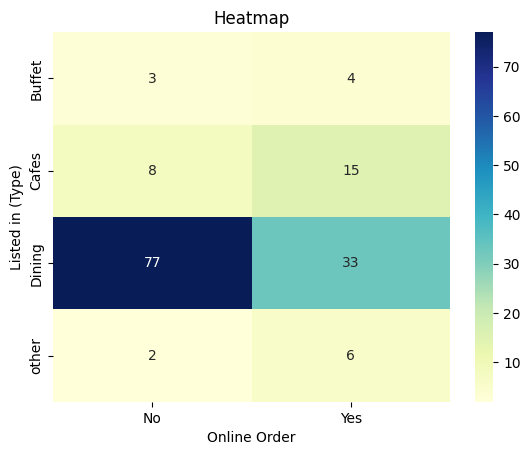

In [23]:
# Q6.which type of restaurant received more offline orders, so that Zomato can provide customers
# with good offers?

pivot_table = df.pivot_table(index = 'listed_in(type)',columns = 'online_order',aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu",fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

In [24]:
# conclusion - Dining type of restaturant has received maximum offline orders.